In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
src = np.float32([(550, 460), (150, 720), (1200, 720), (770, 460)])
dst = np.float32([(100, 0), (100, 720), (1100, 720), (1100, 0)])

# Get the transformation matrices.
M = cv2.getPerspectiveTransform(src, dst)
M_inv = cv2.getPerspectiveTransform(dst, src)

# Apply the transformations
def camera_to_birds_eye_view(img):
    size=(1280, 720)
    return cv2.warpPerspective(img, M, size, flags=cv2.INTER_LINEAR)

def birds_eye_to_camera_view(img):
    size=(1280, 720)
    return cv2.warpPerspective(img, M_inv, size, flags=cv2.INTER_LINEAR)

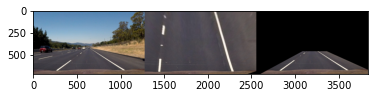

In [14]:
img = cv2.imread('straight_lines2.jpg')
birds_eye_view = camera_to_birds_eye_view(img)
camera_view = birds_eye_to_camera_view(birds_eye_view)

combined_img = cv2.cvtColor(np.hstack([img, birds_eye_view, camera_view]), cv2.COLOR_BGR2RGB)
plt.imshow(combined_img)